<a href="https://colab.research.google.com/github/saikirankesoju/NLP/blob/main/NLP_29-08-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of tweets per label:
target
0    4342
1    3271
Name: count, dtype: int64


/tmp/ipython-input-527247433.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


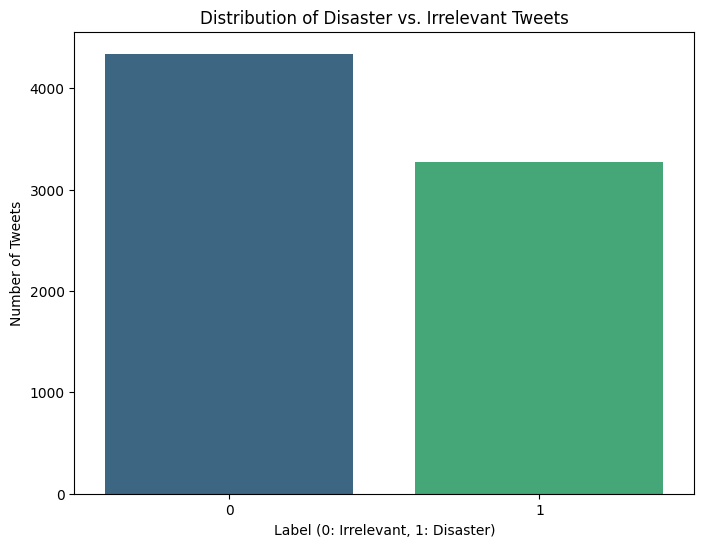


--- Sample Tweets ---
                                                                                                                                                          text  target
Irrelevant (0)       15                                                                                                                         What's up man?       0
                     16                                                                                                                          I love fruits       0
                     17                                                                                                                       Summer is lovely       0
                     18                                                                                                                      My car is so fast       0
                     19                                                                                                           What a goooo

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Preprocessing applied. A 'processed_text' column has been added.
                                                                                                                                    text                                                                               processed_text
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                     [deeds, reason, may, allah, forgive, us]
1                                                                                                 Forest fire near La Ronge Sask. Canada                                                [forest, fire, near, la, ronge, sask, canada]
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected  [residents, asked, place, notified, officers, evacuation, shelter, place, orders, expected]
3              

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipython-input-527247433.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_15_df, palette='plasma')


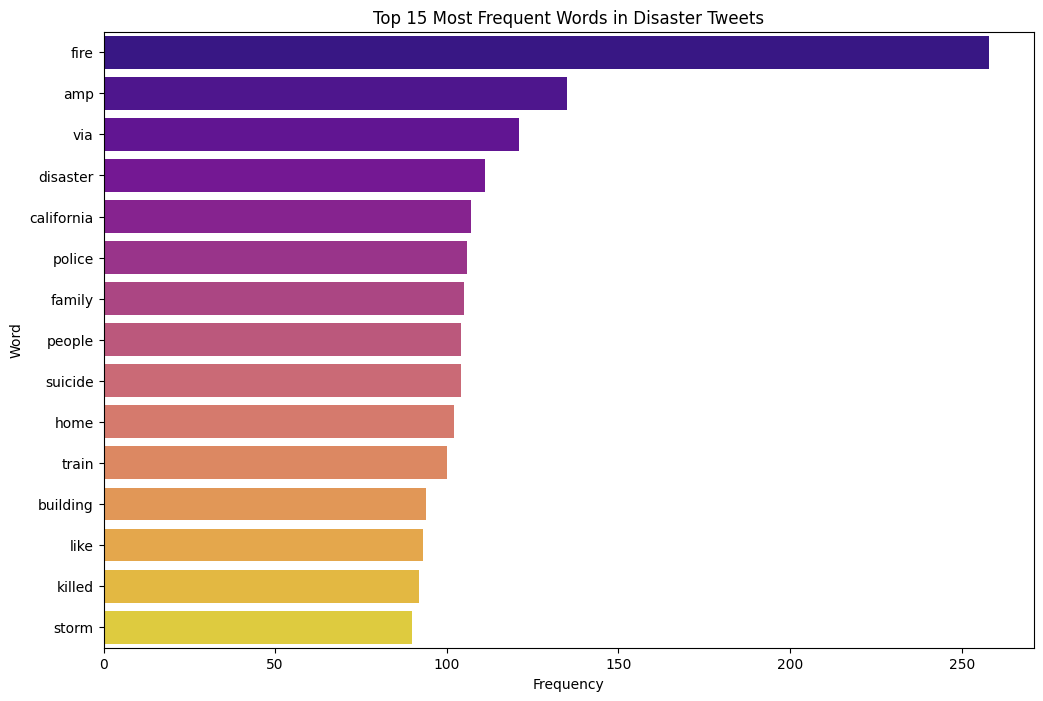

Average tweet length (in tokens) BEFORE preprocessing: 14.90
Average tweet length (in tokens) AFTER preprocessing: 7.91
TF-IDF matrix created.
Shape of the matrix: (7613, 5000)
--- Model Performance ---
Accuracy: 0.7965

                precision    recall  f1-score   support

Irrelevant (0)       0.78      0.89      0.83       874
  Disaster (1)       0.82      0.67      0.74       649

      accuracy                           0.80      1523
     macro avg       0.80      0.78      0.79      1523
  weighted avg       0.80      0.80      0.79      1523



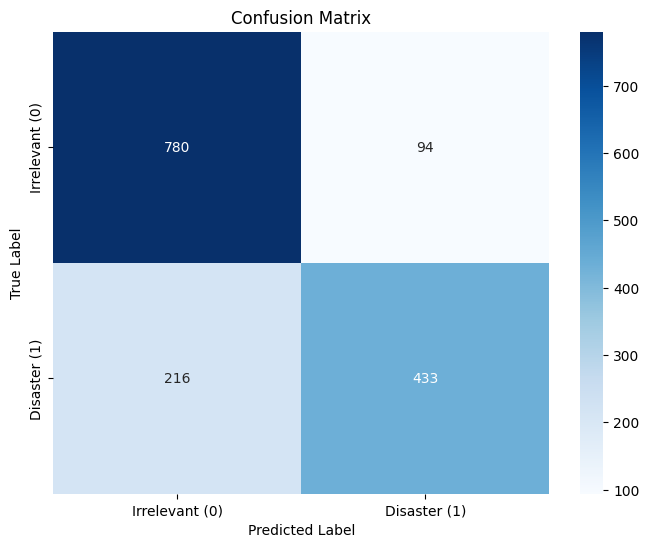

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the file is named 'train.csv' in the same directory
try:
    df = pd.read_csv('/content/train.csv')
except FileNotFoundError:
    print("Please make sure 'train.csv' is in the current directory.")
    # Create a dummy dataframe for demonstration
    data = {'text': ['Sample tweet 1', 'Sample disaster 2', 'Just a joke 3', 'Fire in my kitchen 4'],
            'target': [0, 1, 0, 1]}
    df = pd.DataFrame(data)

# Display the number of tweets per label
label_counts = df['target'].value_counts()
print("Number of tweets per label:")
print(label_counts)

# Plotting the label counts
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Disaster vs. Irrelevant Tweets')
plt.xlabel('Label (0: Irrelevant, 1: Disaster)')
plt.ylabel('Number of Tweets')
plt.xticks([0, 1])
plt.show()

# Display 5 sample tweets from each class
print("\n--- Sample Tweets ---")
irrelevant_samples = df[df['target'] == 0].head(5)
disaster_samples = df[df['target'] == 1].head(5)

# Combine into a single display table
samples_df = pd.concat([irrelevant_samples, disaster_samples], keys=['Irrelevant (0)', 'Disaster-related (1)'])
print(samples_df[['text', 'target']].to_string())

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure NLTK data is downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """A function to clean and preprocess a single tweet."""
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    processed_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return processed_tokens

# Apply the pipeline to the dataframe
df['processed_text'] = df['text'].apply(preprocess_text)
print("Preprocessing applied. A 'processed_text' column has been added.")
print(df[['text', 'processed_text']].head().to_string())


from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Select 5 sample tweets
sample_texts = df['text'].head()

comparison_data = []
for text in sample_texts:
    # Use the pipeline from Q2
    tokens = preprocess_text(text)

    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

    comparison_data.append({
        "Original": " ".join(tokens),
        "Stemmed": " ".join(stemmed),
        "Lemmatized": " ".join(lemmatized)
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string())


from collections import Counter

# Apply lemmatization to the processed tokens
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['processed_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Filter for disaster-related tweets only (label=1)
disaster_tweets_words = df[df['target'] == 1]['lemmatized_text'].sum()

# Get the frequency distribution
word_freq = Counter(disaster_tweets_words)

# Get the top 15 most frequent words
top_15_words = word_freq.most_common(15)
top_15_df = pd.DataFrame(top_15_words, columns=['Word', 'Frequency'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=top_15_df, palette='plasma')
plt.title('Top 15 Most Frequent Words in Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# Calculate length before preprocessing (based on simple space split)
df['len_before'] = df['text'].apply(lambda x: len(x.split()))
avg_len_before = df['len_before'].mean()

# Calculate length after preprocessing
df['len_after'] = df['processed_text'].apply(len)
avg_len_after = df['len_after'].mean()

print(f"Average tweet length (in tokens) BEFORE preprocessing: {avg_len_before:.2f}")
print(f"Average tweet length (in tokens) AFTER preprocessing: {avg_len_after:.2f}")


from sklearn.feature_extraction.text import TfidfVectorizer

# The TfidfVectorizer requires strings, not lists of tokens
df['lemmatized_str'] = df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens))

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Create the feature matrix X and the target vector y
X = tfidf_vectorizer.fit_transform(df['lemmatized_str'])
y = df['target']

print("TF-IDF matrix created.")
print(f"Shape of the matrix: {X.shape}") # (num_tweets, max_features)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Report performance
print("--- Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(y_test, y_pred, target_names=['Irrelevant (0)', 'Disaster (1)']))


from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Irrelevant (0)', 'Disaster (1)'],
            yticklabels=['Irrelevant (0)', 'Disaster (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()